In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [2]:
qbs = pd.read_csv('../Capstone_csv_file/qbs_comp%_salary_18-19')

In [3]:
qbs.dtypes

NAME           object
COMP%         float64
COMP%_rank    float64
salary          int64
dtype: object

In [4]:
qbs.head()

,NAME,COMP%,COMP%_rank,salary
0,Drew Brees,74.4,1.0,25000000
1,Nick Foles,72.3,2.0,5500000
2,Kirk Cousins,70.1,3.0,28000000
3,Chase Daniel,69.7,4.0,5000000
4,Carson Wentz,69.6,5.0,6669085


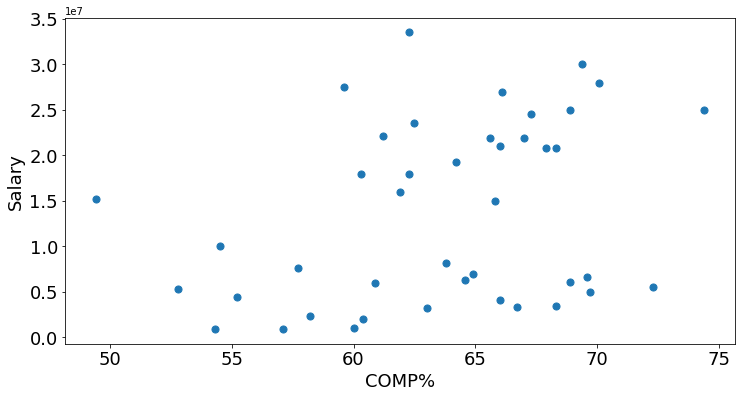

In [5]:
ax = qbs.plot(kind="scatter", x = 'COMP%',  y = 'salary', figsize = (12,6), s = 50)
plt.xlabel('COMP%', fontsize=18)
plt.ylabel("Salary", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)

In [6]:
ss = StandardScaler()
X = ss.fit_transform(qbs.loc[:, ['COMP%', 'salary']])

In [7]:
X.mean(axis = 0)

array([-2.11471052e-17, -7.40148683e-17])

In [8]:
X.std(axis = 0)

array([1., 1.])

In [9]:
km = KMeans(n_clusters = 5, random_state = 27)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=27, tol=0.0001, verbose=0)

In [10]:
km.cluster_centers_

array([[-1.5805063 , -0.80585474],
       [-0.19039102, -0.90971909],
       [ 0.86090885,  1.08499846],
       [ 0.95456321, -0.9056519 ],
       [-0.24168358,  0.8021613 ]])

In [11]:
km.predict(X)

array([2, 3, 2, 3, 3, 2, 3, 2, 3, 2, 2, 2, 2, 3, 2, 3, 2, 4, 2, 1, 1, 4,
       1, 1, 4, 4, 4, 4, 4, 1, 1, 4, 1, 4, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int32)

In [12]:
qbs['clusters'] = km.labels_
qbs.head()

,NAME,COMP%,COMP%_rank,salary,clusters
0,Drew Brees,74.4,1.0,25000000,2
1,Nick Foles,72.3,2.0,5500000,3
2,Kirk Cousins,70.1,3.0,28000000,2
3,Chase Daniel,69.7,4.0,5000000,3
4,Carson Wentz,69.6,5.0,6669085,3


In [13]:
ss.inverse_transform(km.cluster_centers_)

array([[5.49000000e+01, 5.83813000e+06],
       [6.25142857e+01, 4.83093029e+06],
       [6.82727273e+01, 2.41742273e+07],
       [6.87857143e+01, 4.87037086e+06],
       [6.22333333e+01, 2.14314814e+07]])

In [14]:
qbs.groupby('clusters')[['COMP%', 'salary']].mean()

,COMP%,salary
clusters,,
0,54.900000,5.838130e+06
1,62.514286,4.830930e+06
2,68.272727,2.417423e+07
3,68.785714,4.870371e+06
4,62.233333,2.143148e+07


In [15]:
centroids = qbs.groupby('clusters')[['COMP%', 'salary']].mean()

<Figure size 504x504 with 0 Axes>

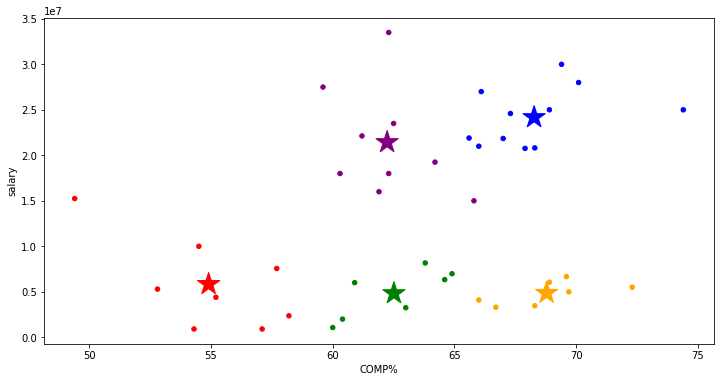

In [16]:
plt.figure(figsize = (7,7));

colors = ['red', 'green', 'blue', 'orange', 'purple']
qbs['color'] = qbs['clusters'].map(lambda p: colors[p])

ax = qbs.plot(    
    kind = 'scatter', 
    x = 'COMP%', y = 'salary',
    figsize = (12,6),
    c = qbs['color']
);

centroids.plot(
    kind = 'scatter', 
    x = 'COMP%', y = 'salary', 
    marker = '*', c = colors, s = 550,
    ax = ax
);

In [17]:
km.inertia_

13.235040731568466

In [18]:
silhouette_score(X, km.labels_)

0.40613325972233144